# Regression - Classification

## Exercise 1: Titanic, but correctly this time!

Take your linear regression model from the previous workshop on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices
import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns 
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge

import scipy.stats
import scipy.special



from sklearn.model_selection import train_test_split

sns.set()

In [3]:
# exercise 1

In [4]:
df_titan = sns.load_dataset('titanic')
df_titan.dropna()
df_titan = df_titan[df_titan['age'].notnull()]
df_titan.isnull().sum()
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [5]:
df_titan['survived'] = df_titan['survived'].astype(np.bool)
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    bool    
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(3), object(5)
memory usage: 65.3+ KB


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_18726/3387650245.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_titan['survived'] = df_titan['survived'].astype(np.bool)


In [6]:
x = df_titan[['pclass', 'sex', 'age','fare']]
y = df_titan[['survived']]
sex = pd.get_dummies(x['sex'],drop_first=True )
x = x.drop('sex', axis=1)
x.insert(1,'sex_',sex)

x#.to_numpy()

,pclass,sex_,age,fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
885,3,0,39.0,29.1250
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
889,1,1,26.0,30.0000


In [7]:
x.shape # (714, 4)

(714, 4)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

model_LG = LogisticRegression(C=1e8, random_state=0)
model_LG.fit(X_train,y_train)
print('Coefficients: ', model_LG.coef_)
print('INTERCEPT: ', model_LG.intercept_, model_LG.coef_)

Coefficients:  [[-1.22051444e+00 -2.45568980e+00 -3.45896943e-02  2.27956330e-03]]
INTERCEPT:  [4.69772197] [[-1.22051444e+00 -2.45568980e+00 -3.45896943e-02  2.27956330e-03]]


/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
x_plot = x.copy()
x_plot = x_plot.sort_values(by=['age'])
x_plot

,pclass,sex_,age,fare
803,3,1,0.42,8.5167
755,2,1,0.67,14.5000
644,3,0,0.75,19.2583
469,3,0,0.75,19.2583
78,2,1,0.83,29.0000
...,...,...,...,...
116,3,1,70.50,7.7500
493,1,1,71.00,49.5042
96,1,1,71.00,34.6542
851,3,1,74.00,7.7750


In [83]:

y_preds = model_LG.predict(x_plot)


In [15]:
min_age = x['age'].min()
max_age = x['age'].max()
age_range = np.linspace(min_age, max_age, 714)

In [49]:
X = x.copy()
for col in X.columns:
    X[str(col)]=X[col].mean()
X['age'] = age_range
X

,pclass,sex_,age,fare
0,2.236695,0.634454,0.420000,34.694514
1,2.236695,0.634454,0.531613,34.694514
2,2.236695,0.634454,0.643226,34.694514
3,2.236695,0.634454,0.754839,34.694514
4,2.236695,0.634454,0.866452,34.694514
...,...,...,...,...
885,2.236695,0.634454,79.553548,34.694514
886,2.236695,0.634454,79.665161,34.694514
887,2.236695,0.634454,79.776774,34.694514
889,2.236695,0.634454,79.888387,34.694514


In [87]:
loss_func = scipy.special.expit(X@(model_LG.coef_[0]) + model_LG.intercept_)#.ravel()
loss_func

0      0.616411
1      0.615498
2      0.614584
3      0.613669
4      0.612753
         ...   
885    0.094246
886    0.093917
887    0.093589
889    0.093262
890    0.092936
Length: 714, dtype: float64

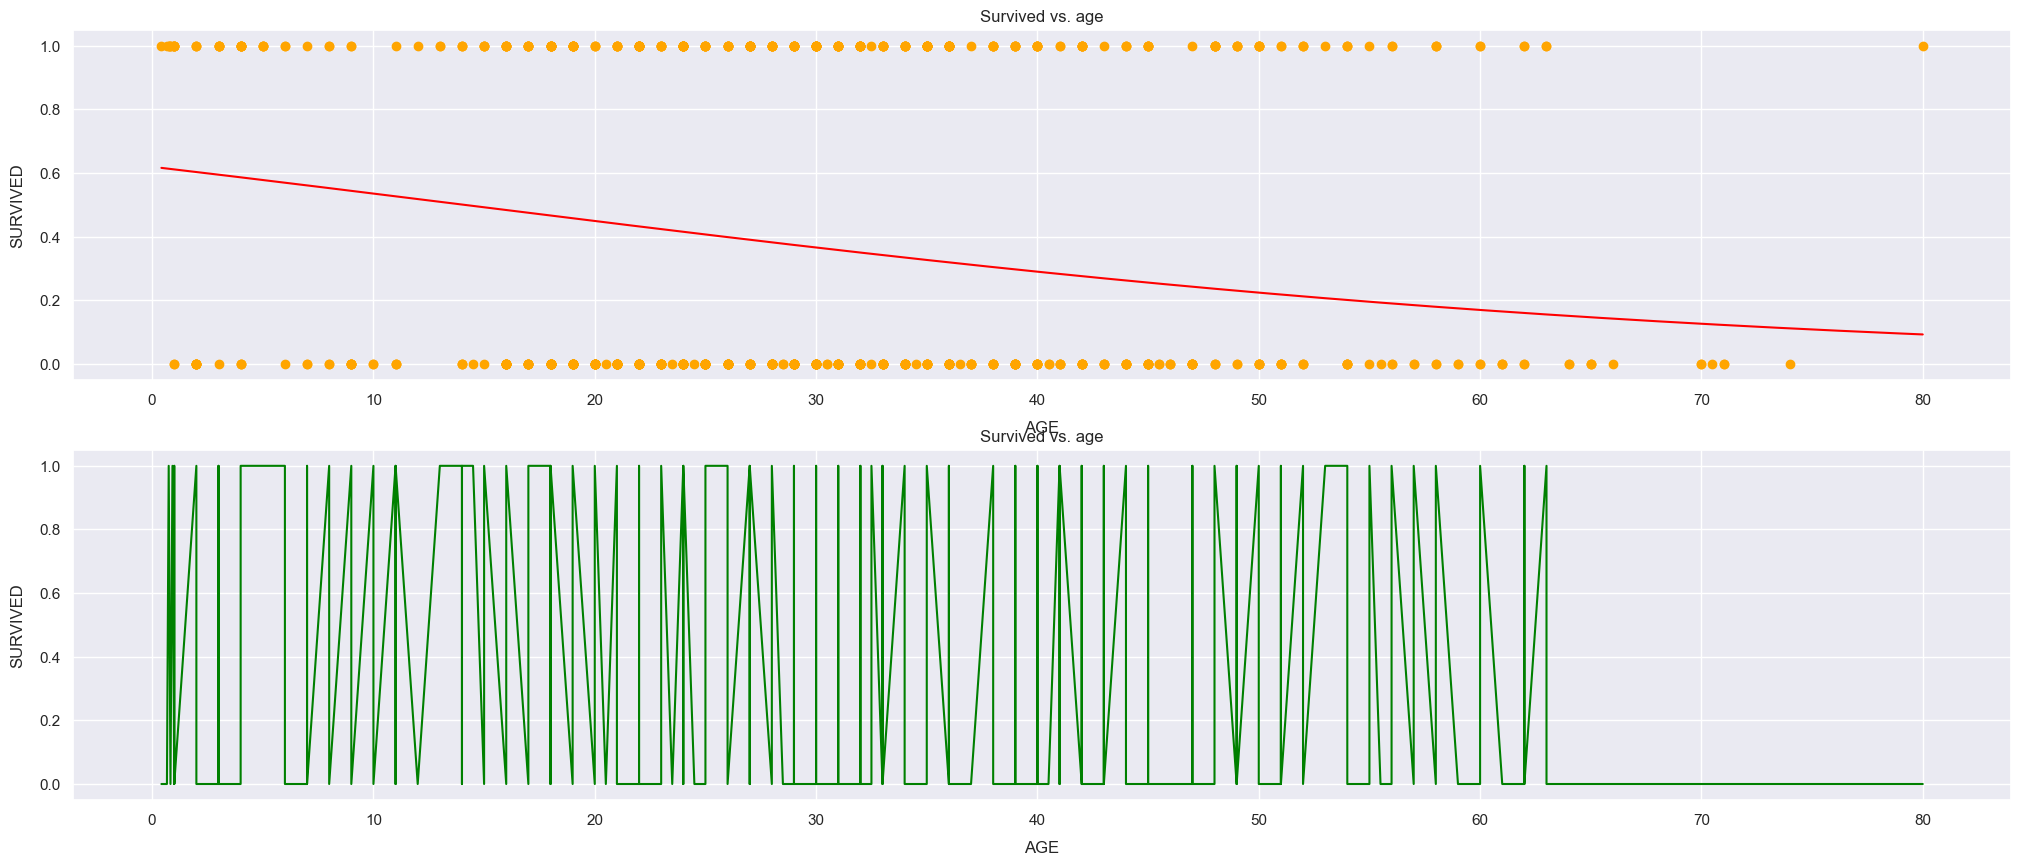

In [92]:

fig, (ax1, ax2) = plt.subplots(2, figsize=(25, 10))

ax1.scatter(x['age'], y,color='orange')
ax2.plot(x_plot['age'], y_preds,color='green')
ax1.plot(age_range, loss_func,color='red');


ax1.set_title('Survived vs. age')
ax1.set_xlabel('AGE', labelpad=10)
ax1.set_ylabel('SURVIVED', labelpad=10)

ax2.set_title('Survived vs. age')
ax2.set_xlabel('AGE', labelpad=10)
ax2.set_ylabel('SURVIVED', labelpad=10)



plt.show()

In [ ]:
# We've obtained a sigmoid
# showing the sharp decline in survival from 0->50 years old
# then showing a slower slopes between 50->80 years old

In [135]:
#----------------------- ADDRESSING FEEDBACK from Instructor Review ----------------------------- #

"""please resubmit with answers to the discussion questions 
 (use the metrics provided to measure the difference in model performance).
 compare the classification model metrics (accuracy, ROC plot, F1, precision/recall)."""

'please resubmit with answers to the discussion questions \n (use the metrics provided to measure the difference in model performance).\n compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).'

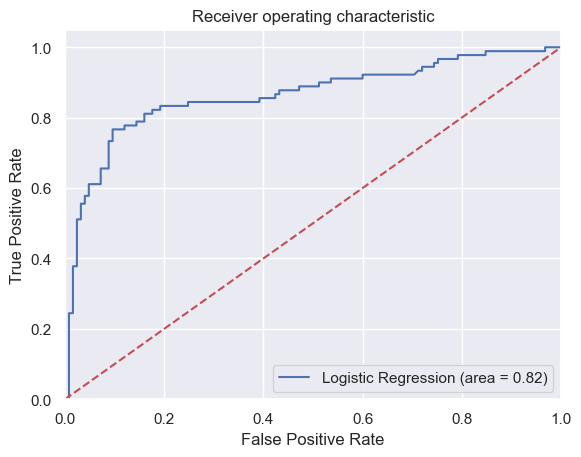

In [132]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model_LG.predict(X_test)) #logreg is because it's using a sigmoid inside

fpr, tpr, thresholds = roc_curve(y_test, model_LG.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [133]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model_LG.predict(X_test))) 



[[109  16]
 [ 20  70]]


In [129]:
TN | FP
  ---
FN | TP

IndentationError: unexpected indent (4097441323.py, line 2)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_LG.predict(X_test)))

              precision    recall  f1-score   support

       False       0.84      0.87      0.86       125
        True       0.81      0.78      0.80        90

    accuracy                           0.83       215
   macro avg       0.83      0.82      0.83       215
weighted avg       0.83      0.83      0.83       215



In [ ]:
# INTERPRETATION:
The ROC score is 0.82>0.5. (A score >0.5 is considered GOOD).
Based on the blue line, the rate of True Positive evolves faster than the rate of False Positive.


Precision = TP /(TP + FP). Ability to predict precise output: when FP is low the PRECISION ~1
Recall = TP/(TP + FN). Ability to recall what the output should be: when FN is low the RECALL ~1
Accuracy: TP + TN / (TP+TN +FP +FN). Ability to give accurate output: when FP and FN are low, ACCURACY ~1
        
Here,
precision = 0.80  GOOD
recall ~> 0.8     GOOD
Accuracy = 0.83   GOOD
F1_score >0.8.    GOOD


Overall this model is accurate and provides meaningful representation of the reality. 80%.
NOTE: This model is particularly good when the 0 < TruePositive rate <0.8
When 0.8<TruePositive rate <1 the rate of false Positive tends to climb faster. 
We could try to find another improved model when 0.8<TruePositive rate <1, to get better predictions.

## Exercise 2: Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.
- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 

```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.
- You should be able to get at least 80% on a test set size of 10_000

In [ ]:
# exercise 2

In [132]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [133]:
X.shape # (70000, 784)  # 28 * 28 = 784
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [134]:
y.shape #(70000,)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [136]:
from math import sqrt, exp
def optimizeModel(x_train, x_test, y_train, y_test, C=1):
    C_ = exp(C)
    logreg =  LogisticRegression(C=C_,random_state=0)
    # We can play with the C to prevent the OVERFIT. Higher C, less overfit
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)

    
    return logreg.score(x_test, y_test)

def best_score(score_rec):

    score_ref = 1    
    list_S = score_rec.values()

    best_score = min(list_S, key=lambda x:abs(x-score_ref)) # We take the score that has the minimum distance with our Reference
    
    for k,v in score_rec.items():
        if v==best_score:
            return k, v



In [99]:

c_range = np.arange(1,15,1)


score_rec = {}
for c in c_range:
    score = optimizeModel(X_train, X_test, y_train, y_test, C=c)
    score_rec.update({c:score})
    
combo = best_score(score_rec)
K,V = combo[0], combo[1]

print('C:', K, 'Score:',V)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C: 1 Score: 0.9189047619047619


/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
logreg = LogisticRegression(C=1e1,random_state=0) # Lower C : overfitting
logreg.fit(X_train, y_train)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0, random_state=0)

In [138]:
y_pred = logreg.predict(X_test) #Predict on the test not train!
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #Percentage


Accuracy of logistic regression classifier on test set: 0.92


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2077
           1       0.96      0.98      0.97      2385
           2       0.91      0.90      0.91      2115
           3       0.91      0.88      0.90      2117
           4       0.91      0.93      0.92      2004
           5       0.88      0.86      0.87      1900
           6       0.94      0.95      0.94      2045
           7       0.94      0.93      0.93      2189
           8       0.87      0.88      0.88      2042
           9       0.90      0.90      0.90      2126

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



In [139]:
logreg.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [111]:
logreg.predict_proba(X_test)[:10]

array([[9.13361922e-01, 4.35238993e-12, 6.75308604e-06, 1.38046245e-08,
        6.19261196e-06, 6.32512705e-04, 6.96926879e-02, 2.61155164e-10,
        1.62995932e-02, 3.24718541e-07],
       [2.37143976e-06, 2.44524744e-11, 2.13862001e-06, 1.93278084e-05,
        9.98398457e-01, 3.02056922e-05, 2.08156947e-06, 7.61156279e-06,
        2.98833339e-04, 1.23897290e-03],
       [2.19654799e-11, 9.98117795e-01, 4.96426029e-06, 7.30383799e-04,
        1.19486703e-06, 4.10969154e-05, 3.87249149e-07, 1.05558031e-05,
        1.71005656e-04, 9.22616037e-04],
       [6.30534253e-04, 2.58131235e-10, 9.91228550e-01, 2.99949938e-04,
        7.89365001e-08, 8.62219280e-04, 2.60500965e-04, 1.01207285e-10,
        6.71815591e-03, 1.05129247e-08],
       [3.46660330e-07, 3.24050048e-09, 1.59490693e-08, 1.79568567e-05,
        4.57981601e-01, 2.23379710e-05, 3.57813667e-05, 5.18762085e-01,
        9.92776074e-06, 2.31699443e-02],
       [7.75588622e-04, 1.52144331e-08, 8.67312597e-02, 2.26029690e-03,
   

In [140]:
y_output = logreg.predict(X_test)[:10000]

In [141]:
y_ref = y_test[:10000]

In [142]:
match_list = []
for i in zip(y_output,y_ref):
    if i[0]==i[1]:
        match_list.append(1)
    else:
        match_list.append(0)
result = sum(match_list)/len(match_list)
print('The % of detection success is: ', result*100, ' %')
    

The % of success is:  91.64  %


In [ ]:
# On a sample of 10000 we can see the score reflected: > 91.5% of correct answers